# <font color='367588'> Uniivariate Time Series Forecasting using ARIMA</font>

## <font color='367588'>Training Statistical Time Series Model (**ARIMA**) on Natural Gas Prices Dataset, spanning **1996 to 2024**</font>

This notebook aims to forecast future prices and includes a separate implementation of **Garch** for modeling volaitlity 

---

#### <font color='367588'>What is ARIMA: A brief overview:</font> 
The  ARIMA model has three components: Autoregressive, Integrated (differencing), and Moving-Average. These are then linearly combined to form the model:

$$
y_t' = c + \sum_{n=1}^{p} \phi_n y_{t-n}' + \sum_{n=1}^{q} \theta_n \varepsilon_{t-n} + \varepsilon_t
$$



- \( y_t' \): The differenced time series, commonly used if the original series is non-stationary.
- \( c \): A constant term (intercept).
- \( \phi_n \): Autoregressive coefficients (AR terms).
- \( \theta_n \): Moving average coefficients (MA terms).
- \( \varepsilon_t \): White noise (error term).


The model is often compactly written ARIMA(p, d, q) where p, d, and q refer to the order of autoregressors, differencing and moving-average components respectively.

### <font color='367588'>The notebook covers the following key concepts:</font>

- **Trend and Seasonality Analysis** using **Seasonal decomposition** 
- **Correlation Analysis** using **ACF** and **PACF** plots
- **Residual Analysis from ARIMA**
---

#### <font color='FFA500'>Stationarity Tests:</font>

- ADF (Augmented Dickey-Fuller) Test  
- KPSS (Kwiatkowski–Phillips–Schmidt–Shin) Test  
- Individual tests for detecting **trend** and **seasonality**  
- **Rolling mean** and **rolling standard deviation** inspection for stationarity

---

#### <font color='FFA500'>Time Series Transformation:</font>

 - **Differencing** to achieve stationarity

---

#### <font color='FFA500'>Model Order Selection:</font>

- Manual estimation of **(p, d, q)** using ACF/PACF plots  
- Automated selection using **auto ARIMA**

---

##### <font color='FFA500'>Volatility Modeling:</font>

- Identifying **conditional heteroscedasticity** using ARCH   
- Modeling **volatility** using the **GARCH** 


# <font color='367588'>Import the required libraries</font>

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd  
from statsmodels.tsa.seasonal import seasonal_decompose                


# <font color='367588'> Data Preparation and Visualization</font>

In [121]:
ts = pd.read_csv("I:/CQAI/TSA/TSD/TSD/data/Henry_Hub_Natural_Gas_Spot_Price.csv",parse_dates=["Month"],index_col=["Month"],  date_format="%b-%Y")

In [122]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, May 2025 to Jan 1997
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   341 non-null    float64
dtypes: float64(1)
memory usage: 5.3+ KB


In [123]:
ts.head()

,Price
Month,
May 2025,3.12
Apr 2025,3.42
Mar 2025,4.12
Feb 2025,4.19
Jan 2025,4.13


In [124]:
ts.describe()

,Price
count,341.000000
mean,4.117742
std,2.132883
min,1.490000
25%,2.580000
50%,3.430000
75%,5.230000
max,13.420000


In [125]:
ts.index = pd.to_datetime(ts.index)

C:\Users\injil\AppData\Local\Temp\ipykernel_11240\366334749.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts.index = pd.to_datetime(ts.index)


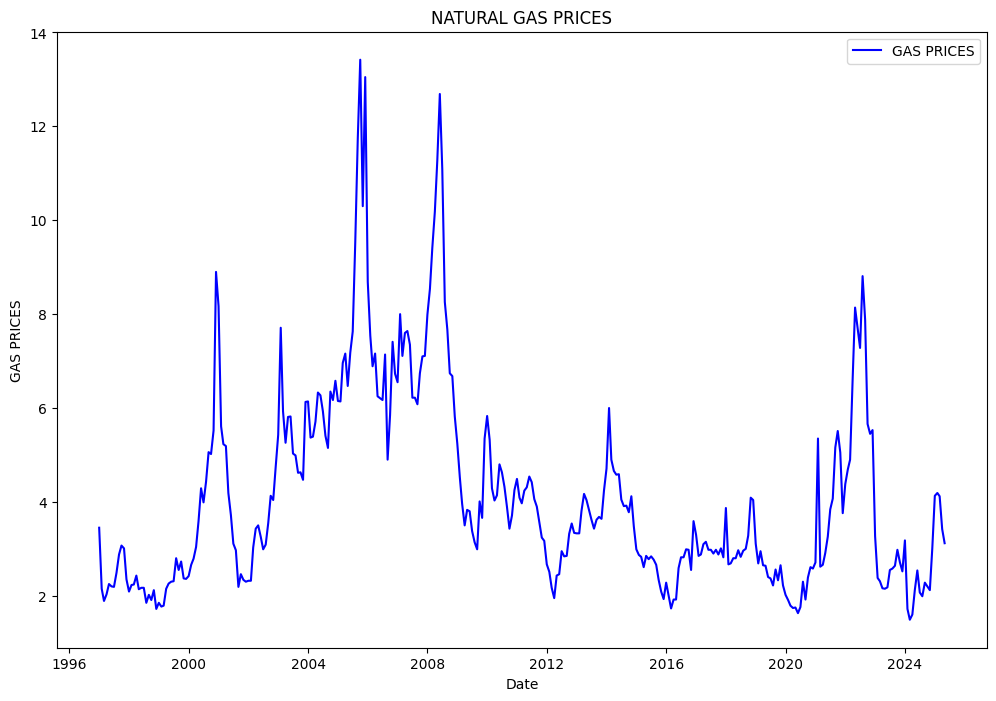

In [126]:
def plot_timeseries(df:pd.DataFrame):
    plt.figure(figsize=(12, 8))
    plt.plot(df.index, ts["Price"], label="GAS PRICES", color="blue")
    plt.title("NATURAL GAS PRICES")
    plt.xlabel("Date")
    plt.ylabel("GAS PRICES")
  
    plt.legend()
    plt.show()
plot_timeseries(ts)

#### Observation from the graph :
- the monotonic trend in the data is not pronounced 
- seasonlaity patterns are not very evident
- an obvious change in variance is visible


## <font color='367588'>Seasonal Decomposition using STL to decompose the time series into three main components:</font>

- **Trend**: Long-term movement in the data
- **Seasonality**: Repeating patterns after certain time interval
- **Residual (Noise)**: Remaining component after removing trend and seasonality


### <font color='367588'>Decomposing a time series helps us:</font>

- **Isolate trend and seasonal effects** from random noise
- **Visualize and understand** underlying patterns in the data
- **Diagnose stationarity issues** (e.g., presence of trend or seasonality)
- **Inform preprocessing steps**, such as differencing or deseasonalizing, to improve model performance
- Enhance **interpretability** before applying forecasting models like ARIMA or GARCH

### <font color='367588'>STL Advantages</font>

- Works well with **non-linear trends**
- Robust to outliers
- Flexible seasonal component (can handle varying seasonality)


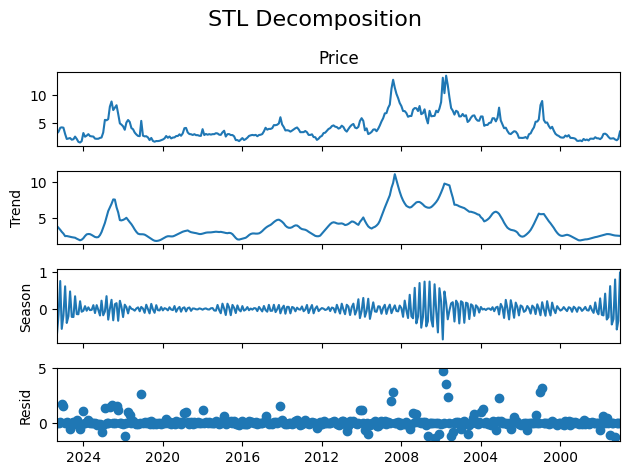

In [143]:

from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt


stl = STL(ts["Price"], period=3, robust=True)
result = stl.fit()

# Extract components
trend = result.trend
seasonal = result.seasonal
resid = result.resid

# Plot components
result.plot()
plt.suptitle("STL Decomposition", fontsize=16)
plt.tight_layout()
plt.show()


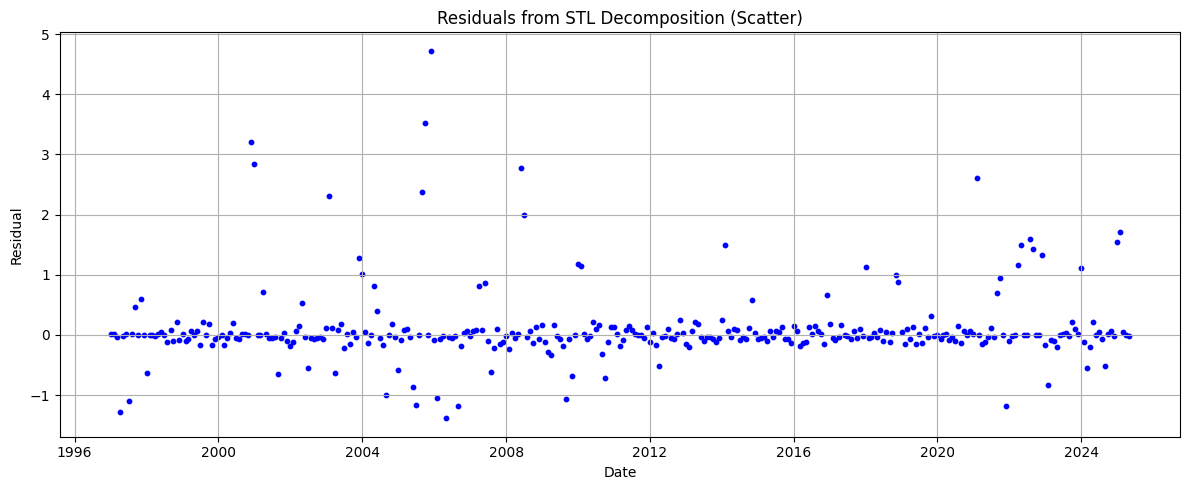

In [144]:
plt.figure(figsize=(12, 5))
resid = resid.dropna()
plt.scatter(resid.index, resid.values, color='blue', s=10)
plt.title("Residuals from STL Decomposition (Scatter)")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()


## <font color='367588'> ACF / PACF Plot to determine stationarity </font>

### Autocorrelation Function (ACF)
The ACF plot shows the **correlation between a time series and its own lagged values**. It helps identify how strongly past values influence future values.

### Partial Autocorrelation Function (PACF)
The PACF plot shows the **direct correlation between a time series and a lagged value**, **excluding the influence of intermediate lags**. 

---

- **Check for Stationarity**:
  - If ACF values **decay slowly** (especially for many lags), it suggests the presence of **trend or non-stationarity**.
  - For stationary series, ACF/PACF typically **drop off quickly**.


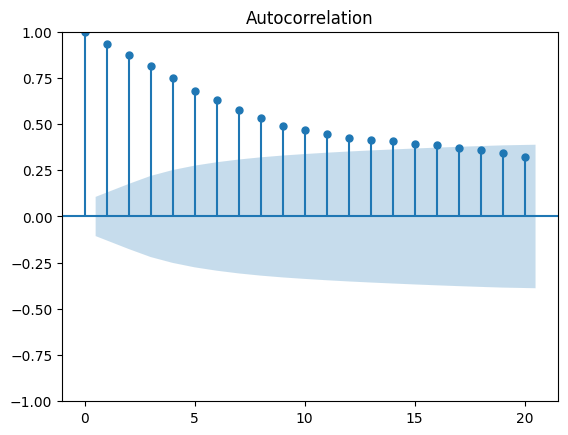

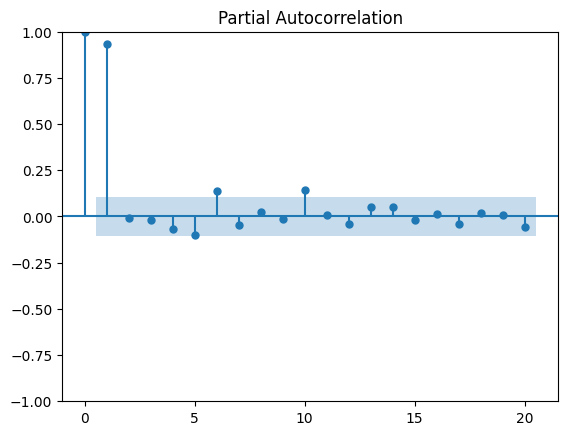

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_pacf(df: pd.DataFrame):
            plot_acf( ts["Price"].dropna(), lags=20)
            plot_pacf( ts["Price"].dropna(), lags=20)
            plt.show()




plot_acf_pacf(ts)

## <font color='367588'>Determining Rolling  Mean and Rolling Standard Deviation</font>
These plots help visualize how the **mean and variance change over time**.


- **Stationary in Mean**:
  - If the **rolling mean remains constant**, the series is likely **stationary in mean**.
  - If the mean **drifts upward or downward**, it suggests the presence of a **trend**, indicating **non-stationarity**.

- **Stationary in Variance**:
  - For a stationary series, the rolling standard deviation should be roughly constant over time.
  - When a time series has a non-constant mean (trend), the rolling standard deviation calculated directly on the raw data may not accurately reflect accurate changes in volatility or variance. Detrending the data will help somewhat  unveil any hidden changes in variance, allowing the rolling standard deviation to reflect the true variability in the time series. 

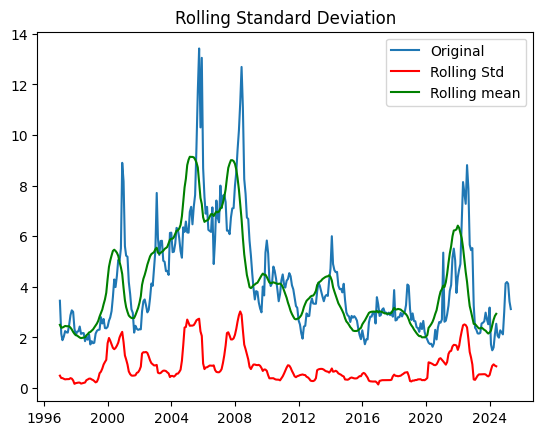

In [19]:
def plot_roll_mean_std(df,col):

    rolling_std =df[col].rolling(window=12).std()
    rolling_mean =df[col].rolling(window=12).mean()
    plt.plot(df[col], label='Original')
    plt.plot(rolling_std, label='Rolling Std', color='red')
    plt.plot(rolling_mean, label='Rolling mean', color='green')
    plt.legend()
    plt.title("Rolling Standard Deviation")
    plt.show() 
plot_roll_mean_std(ts,"Price")





# <font color='367588'>ADF and KPSS test for stationarity</font>

In [20]:
import pandas as pd
from statsmodels.tsa.stattools import kpss



# KPSS Test
def kpss_test(ts, col):

    stat, p_value, lags, critical_values = kpss(ts[col], regression='c',nlags='auto')  # 'c' = constant, 'ct' = trend

    # Print results
    print(f'KPSS Statistic: {stat}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'    {key} : {value}')

    # Interpretation
    if stat > critical_values['5%']:
        print("Result: Likely non-stationary (reject null hypothesis of stationarity)")
    else:
        print("Result: Likely stationary (fail to reject null hypothesis)")
kpss_test(ts, "Price")

KPSS Statistic: 0.48722904224059665
p-value: 0.044543008504370124
Num Lags: 11
Critical Values:
    10% : 0.347
    5% : 0.463
    2.5% : 0.574
    1% : 0.739
Result: Likely non-stationary (reject null hypothesis of stationarity)


In [21]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(ts, col):

    
    # Perform ADF test  
    result = adfuller(ts[col], autolag='AIC')

    # Extract and print results
    adf_stat = result[0]
    p_value = result[1]
    used_lag = result[2]
    n_obs = result[3]
    crit_values = result[4]

    print(f'ADF Statistic: {adf_stat}')
    print(f'p-value: {p_value}')
    print(f'Used Lags: {used_lag}')
    print(f'Number of Observations: {n_obs}')
    print('Critical Values:')
    for key, value in crit_values.items():
        print(f'    {key} : {value}')

    # Interpretation
    if p_value < 0.05:
        print("Result: Likely stationary (reject null hypothesis of unit root)")
    else:
        print("Result: Likely non-stationary (fail to reject null hypothesis)")
adf_test(ts, "Price")


ADF Statistic: -2.6820683081351726
p-value: 0.07719296686160128
Used Lags: 9
Number of Observations: 331
Critical Values:
    1% : -3.4502615951739393
    5% : -2.8703117734117742
    10% : -2.5714433728242714
Result: Likely non-stationary (fail to reject null hypothesis)


# <font color='367588'>Individual test for Monotonic (LInear) trend</font>

In [22]:
import pymannkendall as mk
# Perform Mann-Kendall test

result = mk.original_test(ts["Price"].dropna())
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=0.00016682061112605062, z=3.7645929439870467, Tau=0.1366223908918406, s=7920.0, var_s=4424912.0, slope=0.003653846153846153, intercept=2.8088461538461544)


# <font color='367588'>Individual test for Seasonality</font>

In [23]:
from scipy.stats import friedmanchisquare

# Drop NaNs (e.g., from differencing)
values = ts["Price"].dropna().values

# Ensure the length is divisible by 12 (e.g., complete years)
length = len(values) - (len(values) % 12)
values = values[:length]

# Reshape to (n_years, 12 months)
data = values.reshape(-1, 12)

# Apply Friedman test across columns (months)
stat, p = friedmanchisquare(*data.T)
print(f"Friedman p-value: {p:.6f}")  

# If p-value < 0.05, reject the null hypothesis of equal distributions across months
if p < 0.05:
    print("There are significant differences in the distributions of electric production across months, Means Seasonality exists.")   
else:
    print("No significant differences in the distributions of electric production across months, Seasonality does not exist.")

Friedman p-value: 0.822946
No significant differences in the distributions of electric production across months, Seasonality does not exist.


# <font color='367588'>Differencing the Data to Make it statioanry in Mean</font>

In [24]:

ts["Price_diff"]=ts["Price"].diff()
ts=ts.dropna() 


In [ ]:

#lets check the test results again
kpss_test(ts, "Price_diff")
print ( "-----------------------------------------------------------------------")
adf_test(ts, "Price_diff")

KPSS Statistic: 0.026724948396237545
p-value: 0.1
Num Lags: 1
Critical Values:
    10% : 0.347
    5% : 0.463
    2.5% : 0.574
    1% : 0.739
Result: Likely stationary (fail to reject null hypothesis)
-----------------------------------------------------------------------
ADF Statistic: -7.9452729210405435
p-value: 3.232532003351616e-12
Used Lags: 8
Number of Observations: 331
Critical Values:
    1% : -3.4502615951739393
    5% : -2.8703117734117742
    10% : -2.5714433728242714
Result: Likely stationary (reject null hypothesis of unit root)


C:\Users\injil\AppData\Local\Temp\ipykernel_11240\1601207863.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, lags, critical_values = kpss(ts[col], regression='c',nlags='auto')  # 'c' = constant, 'ct' = trend


# <font color='367588'>Determining appropriate differencing</font>

- This  evaluates the effect of differencing (from `d = 0` to `d = 5`) on the **standard deviation** of the time series.
- The plot shows how variance changes with each level of differencing.
- The **lowest standard deviation occurs at `d = 1`**, suggesting that **first-order differencing is the most appropriate** to stabilize the series and achieve stationarity.


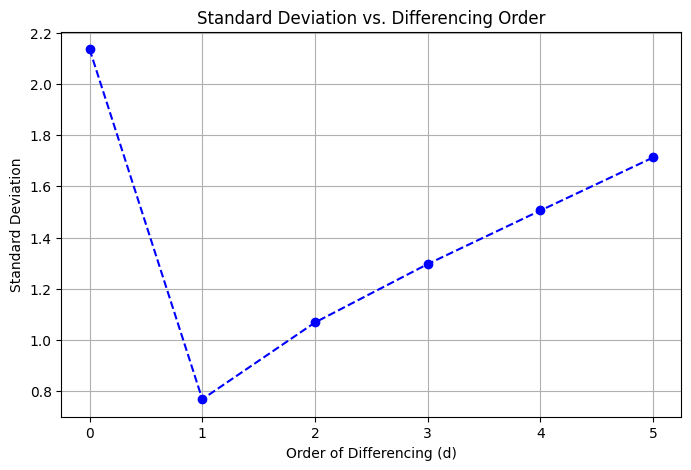

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Try multiple differencing levels

std_devs = []

for d in range(0,6):
    if d == 0:
        diff_series = ts["Price"]
    else:
        diff_series = ts["Price"].diff(d).dropna()
    std_devs.append(diff_series.std())

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(0,6), std_devs, marker='o', linestyle='--', color='blue')
plt.xlabel('Order of Differencing (d)')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation vs. Differencing Order')
plt.grid(True)
plt.xticks(range(0,6))
plt.show()


#### Check on rolling Mean and std: 
- Now rolling std will reflcet its true nature since the data is comparatively stationary in mean now than before. 
-  can comment on potential volatitlity in the data and hence determine if  Saperate Volatiltiy modelin is needed or not
---
- From the plot, we can observe that the **mean of the series appears stabilized** over time after differencing, indicating that the series is comparatively **stationary in mean**.
- Although the **spikes in the rolling standard deviation have reduced** from 2 to 1 at some points, they still fluctuate between **0 and 2 on the Y-axis**, particularly during the **early and recent years**
- This clearly suggests the presence of **changing (non-constant) variance**, i.e., **heteroskedasticity**, which needs to be modeled explicitly for accurate forecasting.

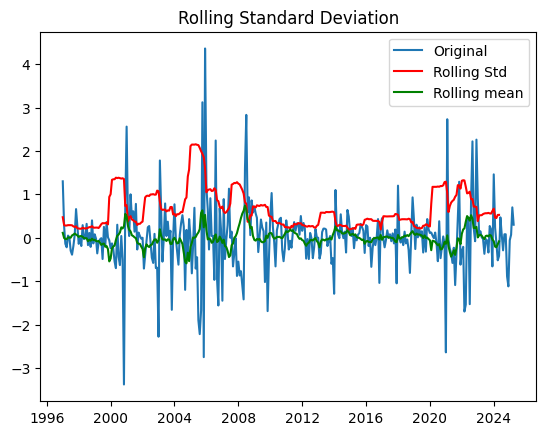

In [30]:
plot_roll_mean_std(ts,"Price_diff")

### ACF/PACF Plot to Determine `p` (AR term) and `q` (MA term) for ARIMA

- If the **PACF plot** has a significant spike at lag `p` but not beyond, and the **ACF plot** decays more gradually, this may suggest an **ARIMA(p, d, 0)** model — indicating an autoregressive (AR) process.

- If the **ACF plot** has a significant spike at lag `q` but not beyond, and the **PACF plot** decays more gradually, this may suggest an **ARIMA(0, d, q)** model — indicating a moving average (MA) process.


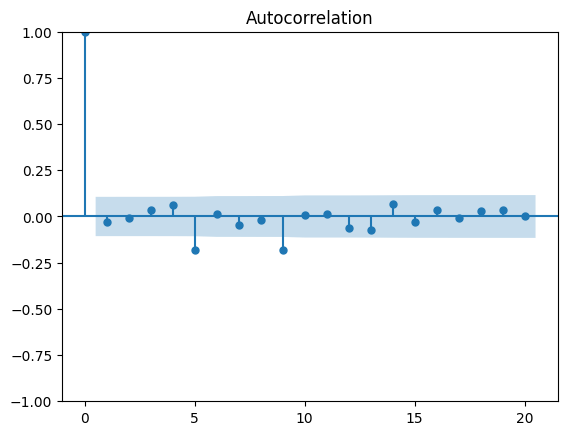

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

result = plot_acf(ts["Price_diff"].dropna(), lags=20)

plt.show()


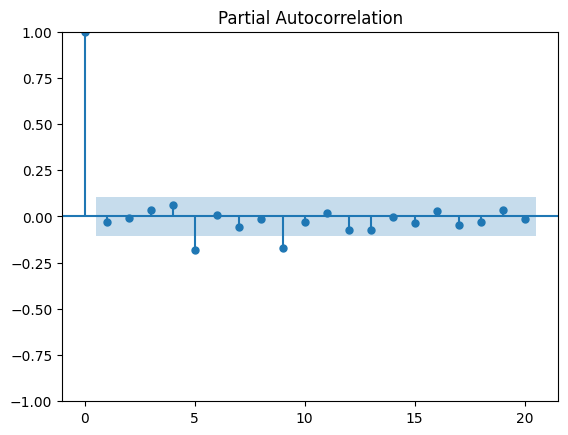

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

result = plot_pacf(ts["Price_diff"].dropna(), lags=20)

plt.show()

 ### ACF and PACF Plot Observations

- In **PACF plot** most values lie within the confidence interval, indicating a lack of strong short-term autoregressive behavior.
- The **ACF plot** similarly shows no significant spikes , with gradual decay not clearly observed — suggesting weak moving average structure at lower lags.
- Notably, both plots show **significant spikes at lag 5 and lag 9**, which could imply the presence of longer-range dependencies in the data.

### Inference

Given the significant autocorrelations at **lag 5** and **lag 9**, a potential ARIMA model configuration could be:

> **ARIMA(5, 1, 9)**

Where:
- `p = 5` is based on the significant spike in the **PACF** plot,
- `d = 1` assumes the series is non-stationary and requires first-order differencing,
- `q = 9` is based on the significant spike in the **ACF** plot.

This model structure captures the longer-lag dependencies that may be influencing the time series. Further validation through auto arima  is required.


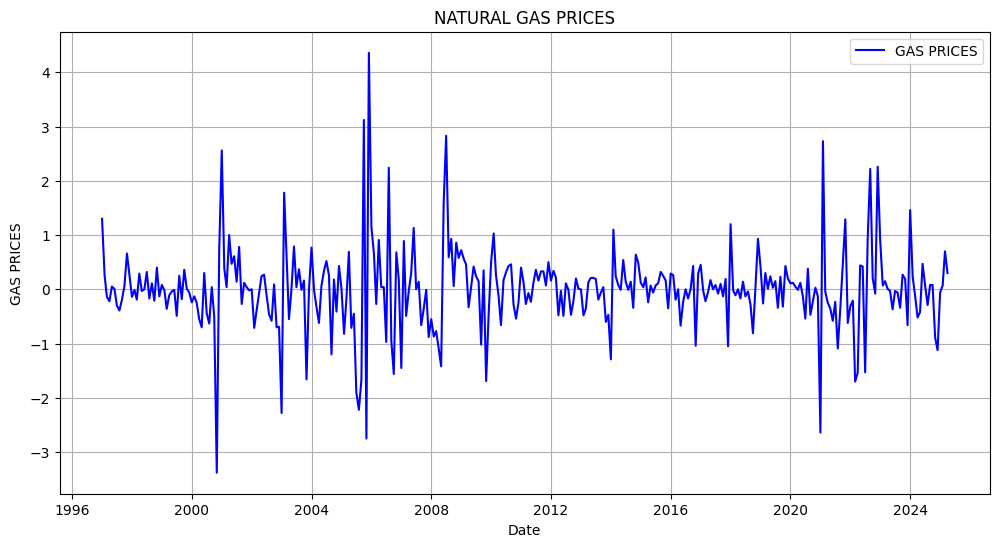

In [35]:
def plot_timeseries(df:pd.DataFrame):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, ts["Price_diff"], label="GAS PRICES", color="blue")
    plt.title("NATURAL GAS PRICES")
    plt.xlabel("Date")
    plt.ylabel("GAS PRICES")
    plt.grid(True)
    plt.legend()
    plt.show()
plot_timeseries(ts)

### Differenced Natural Gas Price Series – Key Observations

- After differencing, the series shows **no clear trend or seasonality**, indicating possible stationarity in mean.


### Volatility Clustering
- **Volatility is high and clustered**, notably between:
  - 2000-2010
  - 2022–2024.

- The series exhibits **volatility clustering**, where **large changes follow large changes** and **small changes follow small ones**.
- This behavior indicates **heteroskedasticity**, which standard ARIMA models cannot capture due to their assumption of constant variance.

### Suggested Modeling Approach

-  To capture and model the volatility dynamics in the data we will use **GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**





In [ ]:
'''
annual_volatility = ts.groupby(ts.index.month).std()
ts['annual_vol'] = ts.index.map(lambda d: annual_volatility.loc[d.month, "Price"])
ts["Price"] = ts["Price"] / ts['annual_vol']

'''
'''
ts['pricevol'] = ts[col].rolling(window=30, min_periods=10).std()
ts[col] = ts[col] / ts['pricevol']

'''


# <font color='367588'>Train - Test split </font>

In [36]:
ts = ts.sort_index(ascending=True)   # From 1997 to 2020
ts


,Price,Price_diff
Month,,
1997-01-01,3.45,1.30
1997-02-01,2.15,0.26
1997-03-01,1.89,-0.14
1997-04-01,2.03,-0.22
1997-05-01,2.25,0.05
...,...,...
2024-12-01,3.01,-1.12
2025-01-01,4.13,-0.06
2025-02-01,4.19,0.07


In [100]:
col="Price"
train = ts[[col]].iloc[:-25]
test = ts[[col]].iloc[-25:]

In [101]:
test.head()

,Price
Month,
2023-04-01,2.16
2023-05-01,2.15
2023-06-01,2.18
2023-07-01,2.55
2023-08-01,2.58


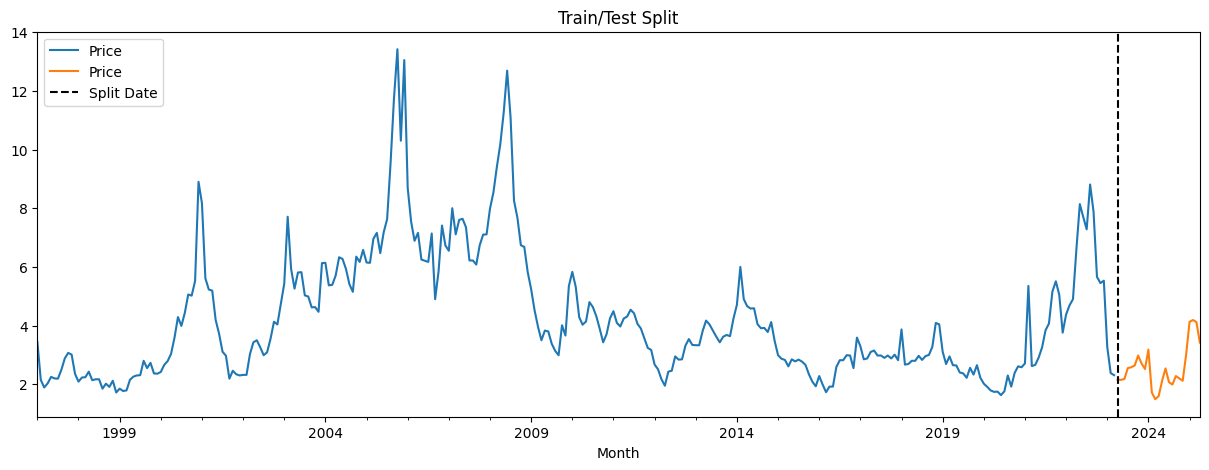

In [102]:


fig, ax = plt.subplots(figsize=(15, 5))  

train.plot(ax=ax, label="Train data")
test.plot(ax=ax, label="Test data")

ax.axvline("2023-04-01", color="black", linestyle="--", label="Split Date")  # ✅ pass an actual date value

ax.legend()
plt.title("Train/Test Split")
plt.show()


# <font color='367588'>Applying pmdarima to automatically detect the order  of ARIMA </font>

In [103]:
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils")

auto_arima = pm.auto_arima(train , stepwise=False, seasonal=False)
auto_arima



ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [104]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  315
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -361.428
Date:                Tue, 01 Jul 2025   AIC                            736.856
Time:                        22:10:51   BIC                            763.102
Sample:                    01-01-1997   HQIC                           747.343
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0089      0.099     -0.089      0.929      -0.204       0.186
ar.L1         -0.1858      0.025     -7.447      0.000      -0.235      -0.137
ar.L2         -0.9739      0.025    -38.301      0.000      -1.024      -0.924
ma.L1          0.1531      0.045      3.393      0.001       0.065       0.242
ma.L2          0.9707      0.034     28.857      0.000       0.905       1.037
ma.L3          0.0222      0.037      0.603      0.547      -0.050       0.094
sigma2         0.5828      0.027     21.265      0.000       0.529       0.636
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               508.45
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.51
Prob(H) (two-sided):                  0.11   Kurtosis:                         9.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# <font color='367588'>Modeling with auto detected order (2,1,3)</font>

In [105]:
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(train["Price"],order=(2,1,3))
model1=model1.fit()
model1.summary()

i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  315
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -361.432
Date:                Tue, 01 Jul 2025   AIC                            734.865
Time:                        22:11:06   BIC                            757.361
Sample:                    01-01-1997   HQIC                           743.854
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1857      0.025     -7.547      0.000      -0.234      -0.137
ar.L2         -0.9738      0.025    -38.471      0.000      -1.023      -0.924
ma.L1          0.1529      0.045      3.408      0.001       0.065       0.241
ma.L2          0.9710      0.033     29.374      0.000       0.906       1.036
ma.L3          0.0221      0.036      0.620      0.535      -0.048       0.092
sigma2         0.5828      0.027     21.474      0.000       0.530       0.636
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               508.01
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.51
Prob(H) (two-sided):                  0.11   Kurtosis:                         9.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
from statsmodels.tsa.arima.model import ARIMA
model2=ARIMA(train["Price"],order=(5,1,9))
model2=model2.fit()
model2.summary()

i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
i:\CQAI\TSA\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  315
Model:                 ARIMA(5, 1, 9)   Log Likelihood                -352.183
Date:                Tue, 01 Jul 2025   AIC                            734.366
Time:                        22:11:21   BIC                            790.607
Sample:                    01-01-1997   HQIC                           756.839
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1345      1.593      0.084      0.933      -2.989       3.258
ar.L2         -0.1473      0.518     -0.284      0.776      -1.163       0.868
ar.L3          0.1049      0.403      0.261      0.794      -0.684       0.894
ar.L4          0.6902      0.129      5.347      0.000       0.437       0.943
ar.L5         -0.3420      1.194     -0.286      0.775      -2.683       1.999
ma.L1         -0.1747      1.593     -0.110      0.913      -3.297       2.947
ma.L2          0.1443      0.457      0.315      0.752      -0.752       1.041
ma.L3         -0.0987      0.374     -0.264      0.792      -0.832       0.634
ma.L4         -0.7008      0.137     -5.102      0.000      -0.970      -0.432
ma.L5          0.1996      1.199      0.166      0.868      -2.150       2.550
ma.L6         -0.0030      0.279     -0.011      0.991      -0.549       0.543
ma.L7         -0.1204      0.140     -0.859      0.390      -0.395       0.154
ma.L8         -0.0148      0.241     -0.062      0.951      -0.488       0.458
ma.L9         -0.0200      0.137     -0.146      0.884      -0.288       0.248
sigma2         0.5478      0.030     18.469      0.000       0.490       0.606
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               384.87
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.02
Prob(H) (two-sided):                  0.09   Kurtosis:                         8.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# <font color='367588'>Plot residuals and density plot to determine the model fit</font>

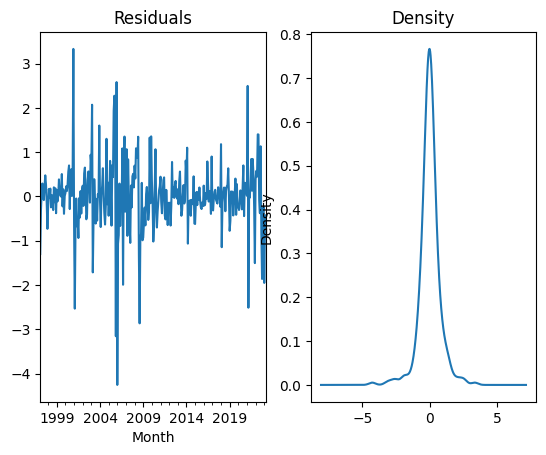

In [107]:
residuals = model1.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

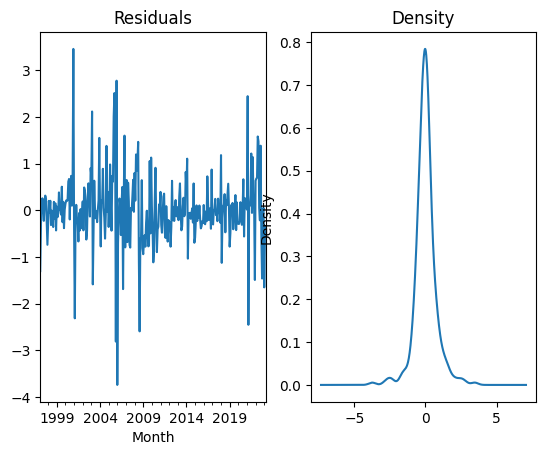

In [108]:
residuals = model2.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

# <font color='367588'>Forecasting on test data</font>

In [109]:
start=len(train)
end=len(train)+len(test)-1
pred1=model1.predict(start=start,end=end).rename('ARIMA Predictions')


In [110]:
start=len(train)
end=len(train)+len(test)-1
pred2=model2.predict(start=start,end=end).rename('ARIMA Predictions')



# <font color='367588'>Forecast vs Original</font>

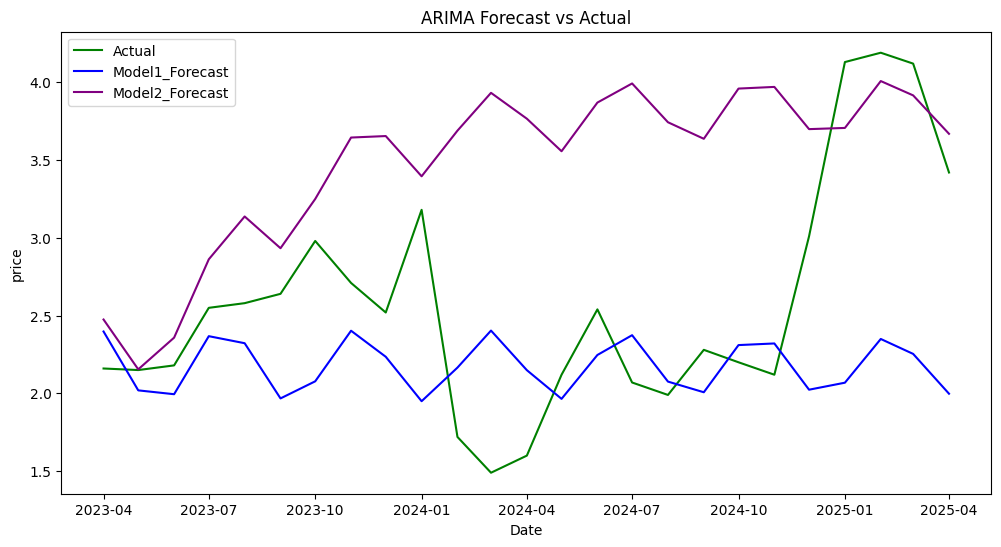

In [111]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual',color='green')
plt.plot(test.index,pred1, label='Model1_Forecast', color='blue')
plt.plot(test.index,pred2, label='Model2_Forecast', color='purple')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

# <font color='367588'>Evaluate</font>

In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean =test[col].mean()
rmse1=sqrt(mean_squared_error(pred1,test[col]))
rmse2=sqrt(mean_squared_error(pred2,test[col]))
print("Rmse Model 1:",rmse1)
print("Rmse Model 2:",rmse2)
print("Mean:" ,mean)

Rmse Model 1: 0.8705761240583564
Rmse Model 2: 1.2196265620353175
Mean: 2.586


# <font color='367588'>Volatility Modeling : </font>

### Perform Arch test to determine conditioanl volatiltiy

In [113]:
# Both arch and garch require the data to be stationary in mean so we use the earlier differnced prices
col="Price_diff"

In [114]:
# ARCH test
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(ts[col].dropna())
if arch_test[1]<0.05: 
    print("Arch effects present")
else:
    print("Arch effects not present")

print("P-value: ", arch_test[1])

Arch effects present
P-value:  1.2061436044318845e-09


# <font color='367588'> GARCH Model Order Selection Using AIC</font>

- This code searches for the **optimal GARCH(p, q)** model by testing different combinations of `p` and `q` from 1 to 9.
- It fits each model to the **training portion of the returns series** (excluding the last 24 points as test data).
- For each model, it computes the **Akaike Information Criterion (AIC)** and keeps track of the model with the **lowest AIC**, which indicates the best balance between fit and complexity.
- Finally, it outputs the `(p, q)` order of the GARCH model with the **(lowest) AIC value**.



In [115]:
from arch import arch_model

test_size = 24
returns = ts[col].dropna()
train_data = returns[:-test_size]  # Use all data except the last 365 days for training

p_values = range(1, 10)
q_values = range(1, 10)

best_aic = np.inf
best_order = None

for p in p_values:
    for q in q_values:
        try:
            model = arch_model(train_data, vol='GARCH', p=p, q=q)
            model_fit = model.fit(disp='off')
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, q)   
        except:
            continue

print(f"Best (p,q) order by AIC: {best_order}")


Best (p,q) order by AIC: (1, 4)


In [116]:
rolling_predictions = []

p_best, q_best = best_order
for i in range(test_size):
    train = returns[:-(test_size - i)]
    model = arch_model(train, vol='GARCH', p=p_best, q=q_best)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))


In [117]:

rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

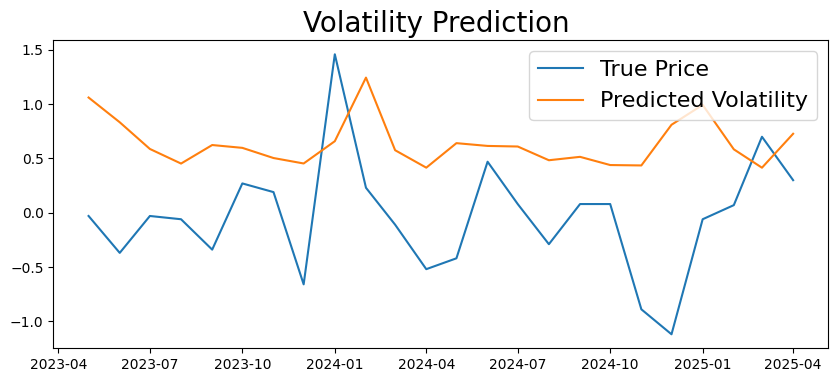

In [119]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction ', fontsize=20)
plt.legend(['True Price', 'Predicted Volatility'], fontsize=16)

#### **Note (with respect to the volatility plot):**  
- The graph compares the **predicted volatility from the GARCH model** with the **true return series**.
- we do **not expect the predicted volatility to match the returns exactly**.  
- Instead, the predicted volatility should **align with the periods of high and low fluctuations** in the return series —  effectively capturing the **volatility spikes** and **quiet periods** observed in the actual data.
